# load tracks and plot them

[Link](https://www.aviso.altimetry.fr/en/missions/future-missions/swot/orbit.html) to AVISO orbit descrition


In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import xarray as xr
#import dask.dataframe as dd

import geopandas as gpd

%matplotlib inline
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature

import mitequinox.utils as ut
#import mitequinox.parcels as pa
#import mitequinox.drifters as dr

In [2]:
ut.load_swot_tracks?

Signature: ut.load_swot_tracks(phase='calval', resolution=None, bbox=None, **kwargs)
Docstring:
Load SWOT tracks

Parameters
----------
phase: str, optional
    "calval" or "science"
resolution: str, optional
    Specify resolution, for example "10s", default is "30s"
File:      ~/mit_equinox/mitequinox/utils.py
Type:      function


In [3]:
tracks = ut.load_swot_tracks()

In [4]:
tracks["swath"].head()

,ID_PASS,START_TIME,geometry
0,1,00:00:00,"MULTIPOLYGON (((-58.44858 -77.56012, -58.54259..."
1,2,00:51:10,"MULTIPOLYGON (((107.21913 77.75019, 107.26484 ..."
2,2,00:51:10,"MULTIPOLYGON (((-180.00000 46.07105, -180.0000..."
3,3,01:42:10,"MULTIPOLYGON (((-87.15948 -77.57334, -87.14768..."
4,4,02:33:20,"MULTIPOLYGON (((81.16482 77.75148, 81.19745 78..."


<AxesSubplot:>

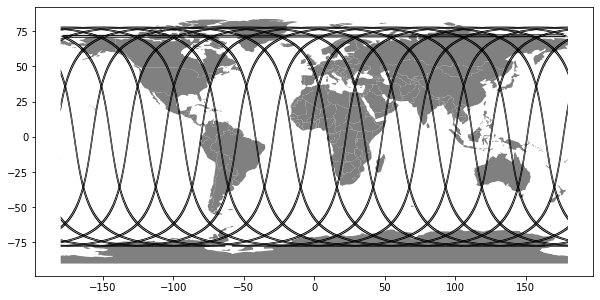

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

world.plot(ax=ax, color='0.5')
tracks["swath"].plot(ax=ax, color='k')

In [6]:
from shapely.geometry import Polygon

In [7]:
def plot_site(bbox, figsize=(10,10)):

    central_lon = (bbox[0]+bbox[1])*0.5
    central_lat = (bbox[2]+bbox[3])*0.5

    polygon = Polygon([(bbox[0], bbox[2]), 
                       (bbox[1], bbox[2]), 
                       (bbox[1], bbox[3]), 
                       (bbox[0], bbox[3]), 
                       (bbox[0], bbox[2]),
                      ])
    #poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
    gdf = tracks["swath"]
    gdf_clipped = gpd.clip(gdf, polygon)

    #crs = ccrs.Orthographic(central_lon, central_lat)
    crs = ccrs.AlbersEqualArea(central_lon, central_lat)

    crs_proj4 = crs.proj4_init

    fig, ax = plt.subplots(1, 1, 
                           subplot_kw={'projection': crs},
                           figsize=figsize,
                          )
    ax.set_extent(bbox)

    #_gdf = gdf.cx[bbox[0]:bbox[1], bbox[2]:bbox[3]]
    _gdf = gdf_clipped
    gdf_crs = _gdf.to_crs(crs_proj4)
    ax.add_geometries(gdf_crs['geometry'],
                      crs=crs,
                      facecolor='grey', 
                      edgecolor='black',
                      alpha=0.5,
                     )

    ax.gridlines(draw_labels=True)
    ax.coastlines(resolution='50m')

    return fig, ax

### Californian site

(<Figure size 720x720 with 1 Axes>, <GeoAxesSubplot:>)

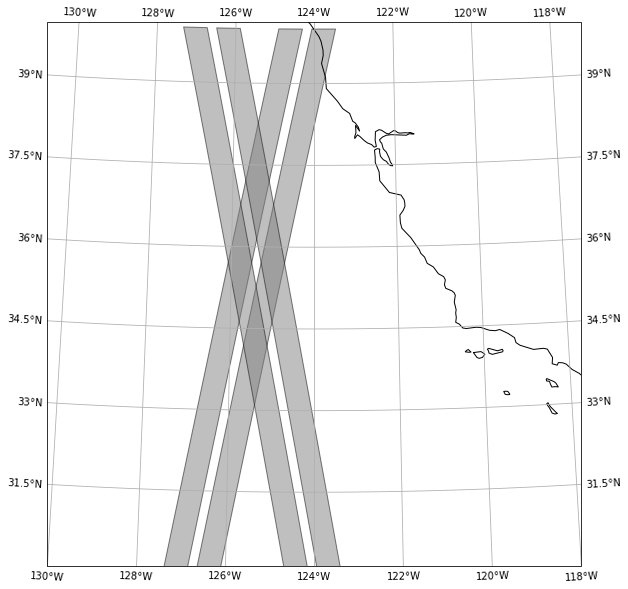

In [8]:
bbox = [-130, -118, 30, 40] # large bbox
plot_site(bbox)

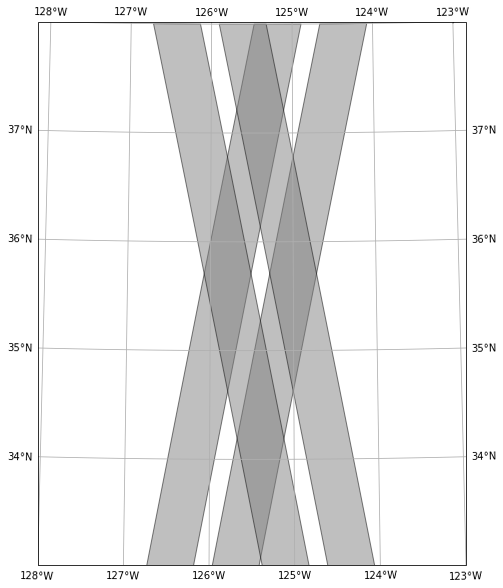

In [9]:
bbox = [-128, -123, 33, 38] # small bbox
plot_site(bbox);

### Mediterranean site

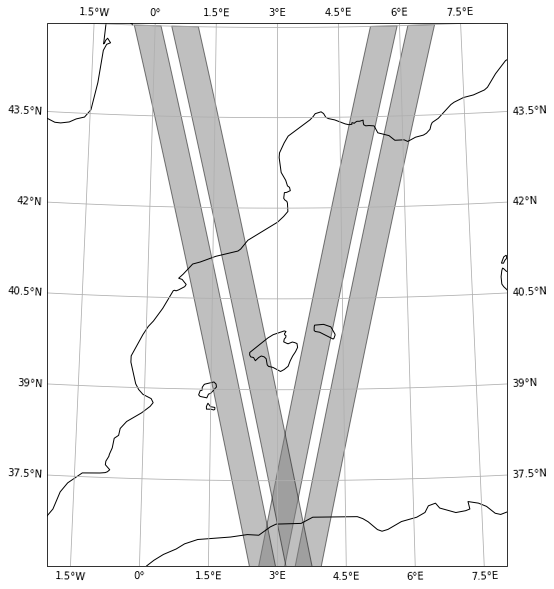

In [10]:
bbox = [-2, 8, 36, 45] # large bbox
plot_site(bbox);

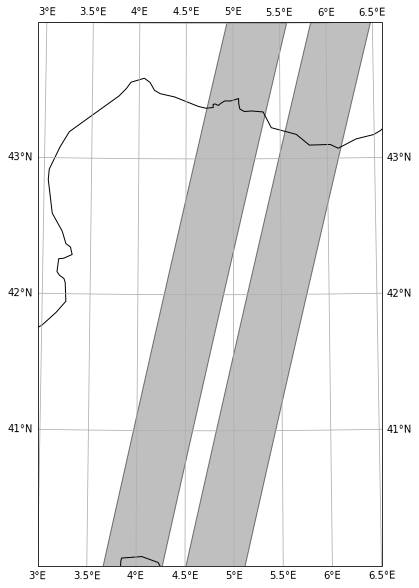

In [11]:
bbox = [3, 6.5, 40, 44] # small bbox
plot_site(bbox);

### Mayote site

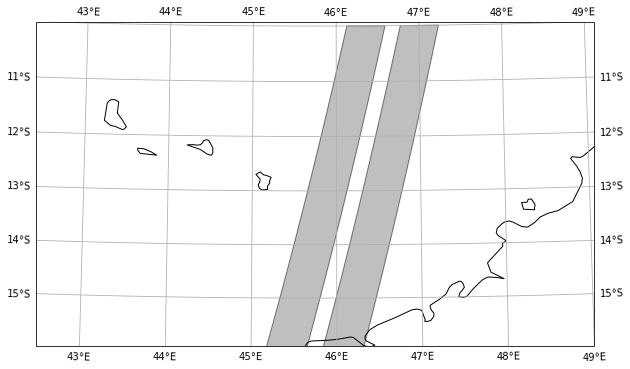

In [12]:
bbox = [42.5, 49, -16, -10] # small bbox
plot_site(bbox);

In [17]:
bathy = ut.load_bathy(extent=bbox)

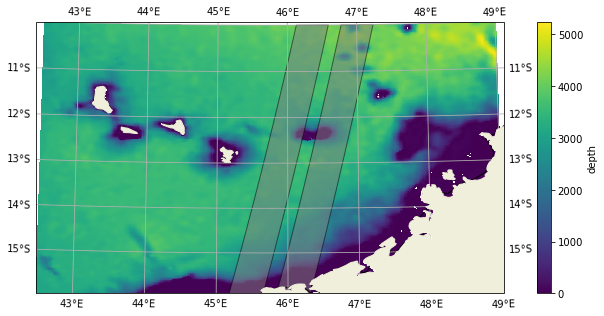

In [21]:
bbox = [42.5, 49, -16, -10] # small bbox

fig, ax = plot_site(bbox, figsize=(12,5))

bathy.plot(ax=ax, transform=ccrs.PlateCarree())

land_feature = cfeature.LAND
ax.add_feature(land_feature, zorder=2)

--- 
## North West Australia

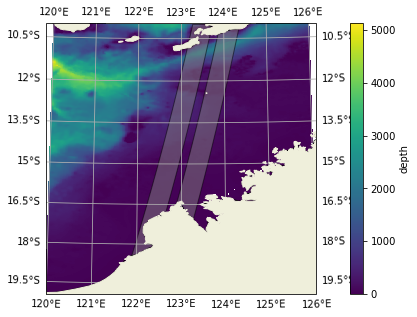

In [13]:
bbox = [120, 126, -20, -10] # small bbox

fig, ax = plot_site(bbox, figsize=(12,5))

bathy = ut.load_bathy(extent=bbox)
bathy.plot(ax=ax, transform=ccrs.PlateCarree())

land_feature = cfeature.LAND
ax.add_feature(land_feature, zorder=2)